# Ejemplo 01

In [75]:
# Ejemplo 01

import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, Add
from tensorflow.keras import Model

In [16]:
#Tensor de entrada
input_tensor = Input(shape=(784, ), name='input_layer')
x_tensor = Dense(64, activation='relu', name='Dense01')(input_tensor)
x_tensor = Dense(64, activation='relu', name='Dense02')(x_tensor)

#Tensor de salida
output_tensor = Dense(10, activation='softmax', name='output_layer')(x_tensor)

model_s = Model(inputs=input_tensor, outputs=output_tensor) 

In [17]:
model_s.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 Dense01 (Dense)             (None, 64)                50240     
                                                                 
 Dense02 (Dense)             (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


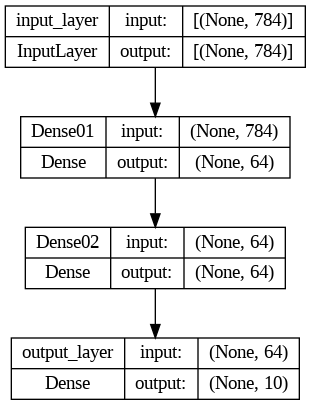

In [33]:
# https://keras.io/api/utils/model_plotting_utils/

keras.utils.plot_model(model_s, to_file="model_s.png", show_shapes=True)

# Ejemplo 02

In [37]:
#model_s.trainable=False
input_tensor_2 = Input(shape=(784, ))
x_tensor_2 = model_s(input_tensor_2)  #Tenemos la instancia del modelo, se puede invocar como si fuera una capa
x_tensor_2 = Dense(32, activation='relu')(x_tensor_2)
x_tensor_2 = Dense(16, activation='relu')(x_tensor_2)
output_tensor_2 = Dense(1, activation='sigmoid')(x_tensor_2)

In [38]:
model_s2 = Model(inputs=input_tensor_2, outputs=output_tensor_2)

In [39]:
model_s2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 model_4 (Functional)        (None, 10)                55050     
                                                                 
 dense_11 (Dense)            (None, 32)                352       
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 55,947
Trainable params: 897
Non-trainable params: 55,050
_________________________________________________________________


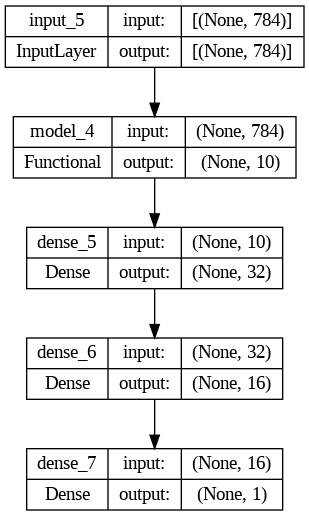

In [32]:
keras.utils.plot_model(model_s2, to_file="model_s2.png", show_shapes=True)

# Actividad 5.1: Modelo X

In [65]:
input_tensor = Input(shape=(256, 256,3))
x_tensor = Conv2D(16, kernel_size=(3,3), strides=1, padding='same', activation='relu')(input_tensor)
x_tensor = Conv2D(64, kernel_size=(3,3), strides=2, padding='same', activation='relu')(x_tensor)
x_tensor = MaxPooling2D(3, padding='same')(x_tensor)
x_tensor= Flatten()(x_tensor)
x_tensor = Dense(256, activation='relu')(x_tensor)
x_tensor = Dense(128, activation='relu')(x_tensor)
output_tensor = Dense(4, activation='relu')(x_tensor)

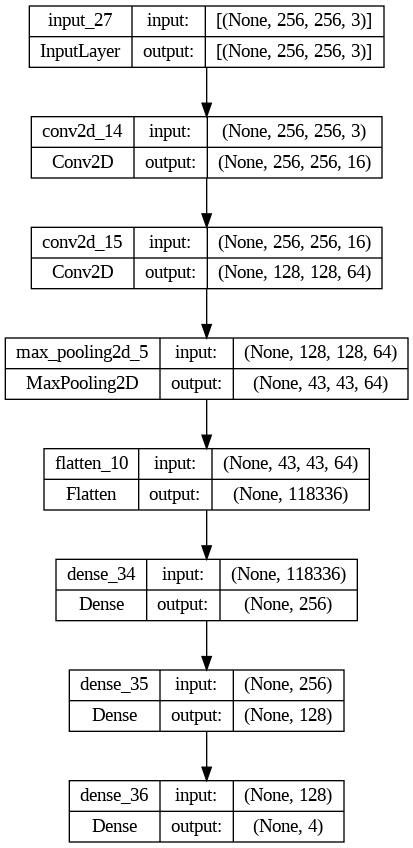

In [66]:
model_x = Model(inputs=input_tensor, outputs=output_tensor)
keras.utils.plot_model(model_x, to_file="model_x.png", show_shapes=True)

# Actividad 5.2 Model Y

In [67]:
input_tensor_y = Input(shape=(28, 28))
y_tensor = Flatten()(input_tensor_y)
y_tensor = Dense(32, activation='relu')(y_tensor)
y_tensor = Dense(64, activation='relu')(y_tensor)
head1 = Dense(50, activation='softmax')(y_tensor)
head2 = Dense(4)(y_tensor)

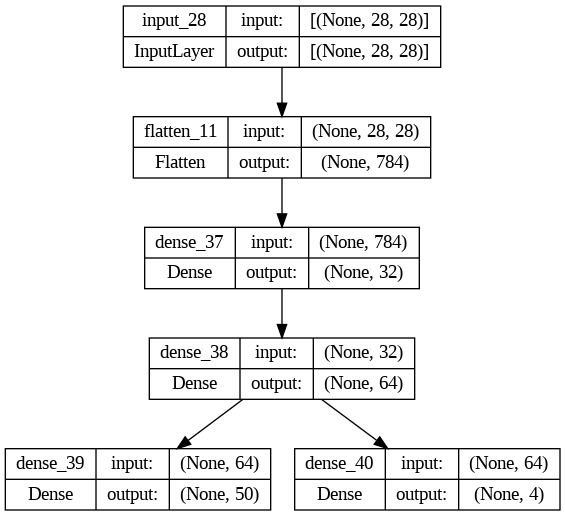

In [68]:
model_y = Model(inputs=[input_tensor_y], outputs=[head1, head2])
keras.utils.plot_model(model_y, to_file="model_y.png", show_shapes=True)

# Actividad 5.3

In [69]:
#branch 1
b1_input_tensor_t = Input(shape=(256, 256))
b1_t_tensor = Flatten()(b1_input_tensor_t) 
b1_t_tensor = Dense(32, activation='relu')(b1_t_tensor) 

#branch 2
b2_input_tensor_t = Input(shape=(100,))
b2_t_tensor = Dense(32, activation='relu')(b2_input_tensor_t)

t_tensor = Concatenate(axis=1)([b1_t_tensor, b2_t_tensor])

output_tensor_t = Dense(4)(t_tensor)

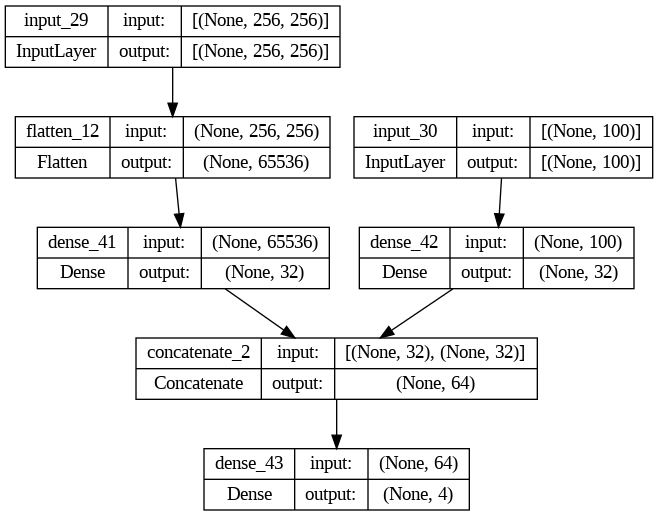

In [70]:
model_t = Model(inputs=[b1_input_tensor_t, b2_input_tensor_t], outputs=output_tensor_t)
keras.utils.plot_model(model_t, to_file="model_t.png", show_shapes=True)

# Actividad 5.4



In [83]:
input_tensor_r = Input(shape=(64, 64,3))
r_tensor = Conv2D(16, kernel_size=(3,3), strides=1, padding='same', activation='relu')(input_tensor_r)
maxp = MaxPooling2D(3, padding='same')(r_tensor)

r_tensor = Conv2D(16, kernel_size=(3,3), strides=1, padding='same', activation='relu')(maxp)

r_tensor = Add()([maxp, r_tensor])

r_tensor= Flatten()(r_tensor)
output_tensor_r = Dense(1, activation='relu')(r_tensor)

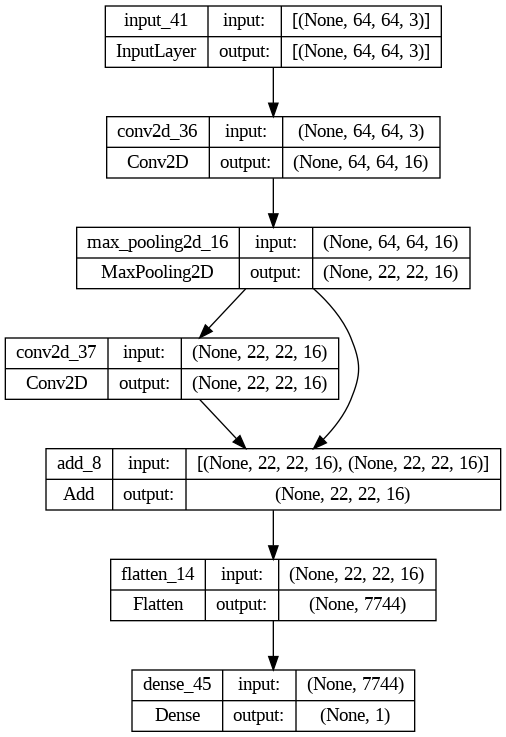

In [86]:
model_r = Model(inputs=input_tensor_r, outputs=output_tensor_r)
keras.utils.plot_model(model_r, to_file="model_r.png", show_shapes=True)